In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re

# PRE-PROCESSING

In [89]:
dataset = pd.read_csv('data/cell_phones_reviews.csv')
dataset.head()

,overall,reviewText,description,brand,feature,price,asin
0,1.0,I had been very happy with my Motorola phone u...,"['used,good,with charger,one of the first in a...",Motorola,"[""The Motorola i730's advanced features, inclu...",NaN,B0000SX3BK
1,1.0,I had been very happy with my Motorola phone u...,"['used,good,with charger,one of the first in a...",Motorola,"[""The Motorola i730's advanced features, inclu...",NaN,B0000SX3BK
2,3.0,I don't own this phone. I own the cheaper Moto...,"['used,good,with charger,one of the first in a...",Motorola,"[""The Motorola i730's advanced features, inclu...",NaN,B0000SX3BK
3,3.0,I don't own this phone. I own the cheaper Moto...,"['used,good,with charger,one of the first in a...",Motorola,"[""The Motorola i730's advanced features, inclu...",NaN,B0000SX3BK
4,4.0,Great phone by Motorola - leaps and bounds ove...,"['used,good,with charger,one of the first in a...",Motorola,"[""The Motorola i730's advanced features, inclu...",NaN,B0000SX3BK


ESPLORIAMO IL DATASET

In [90]:
dataset.shape

(42170, 7)

In [91]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42170 entries, 0 to 42169
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   overall      42170 non-null  float64
 1   reviewText   42143 non-null  object 
 2   description  42170 non-null  object 
 3   brand        42170 non-null  object 
 4   feature      42170 non-null  object 
 5   price        17688 non-null  object 
 6   asin         42170 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.3+ MB


In [92]:
dataset.isnull().sum()

overall            0
reviewText        27
description        0
brand              0
feature            0
price          24482
asin               0
dtype: int64

Rimozione righe con valori null per prezzo e reviewText

In [93]:
dataset.dropna(subset=['price', 'reviewText'], inplace=True)

In [94]:
# regex per il formato corretto dei prezzi
regex = re.compile(r'^\$\d+\.\d+$')

# Filtriamo i dati applicando la regex alla colonna 'price'
dataset = dataset[dataset['price'].apply(lambda x: bool(regex.match(x)))]

In [95]:
dataset.reset_index(drop=True, inplace=True)
dataset.head()

,overall,reviewText,description,brand,feature,price,asin
0,5.0,I have read a lot of the reviews and spoken to...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO
1,4.0,Or maybe not. The good news is that for less ...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO
2,4.0,Having previously owned the LG VX9800 (one of ...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO
3,3.0,3.5 stars. I was very excited about the launc...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO
4,1.0,I want to warn IT professionals that Verizon W...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO


In [96]:
print(dataset.shape)
dataset.isnull().sum()

(17568, 7)


overall        0
reviewText     0
description    0
brand          0
feature        0
price          0
asin           0
dtype: int64

Quanti cellulari diversi sono rimasti dopo aver rimosso le reviews 

In [97]:
len(dataset['asin'].unique())

438

Quali sono i brand di cellulari con più reviews, in seguito alla rimozione

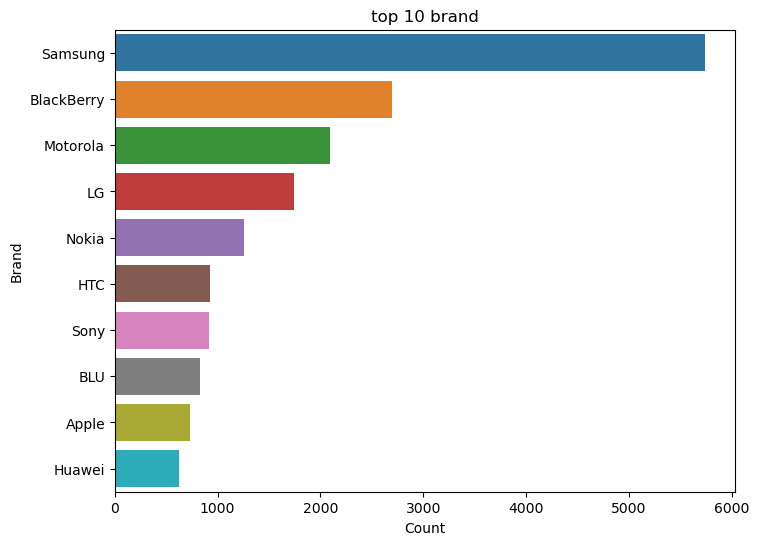

In [98]:
cell_phones_brand_counts = dataset['brand'].value_counts().reset_index()
cell_phones_brand_counts.columns = ['brand', 'count'] 
# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x = cell_phones_brand_counts['count'], y = cell_phones_brand_counts['brand'], orient='h')
plt.title('top 10 brand')
plt.xlabel('Count')
plt.ylabel('Brand')
plt.show()

Data Preprocessing

In [99]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
nltk.download('universal_tagset')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Livio\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Livio\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Livio\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Livio\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package tagsets to
[nltk_data]     C:\Users\Livio\AppData\Roaming\nltk_data...
[nltk_data]   Package tagsets is already up-to-date!
[nltk_data] Downloading package universal_tagset to
[nltk_data]     C:\Users\Livio\AppData\Roaming\nltk_data...
[nltk_data]   Package universal_tagset is already u

True

In [100]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

In [101]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [124]:
from tqdm import tqdm
from afinn import Afinn

afinn = Afinn()
def preprocess(df, column):
    preprocessed_column = []
    # Initialize the AFINN lexicon
    for row in tqdm(df[column], total = len(df[column])):
        filter_text = []
        afinn_scores = []
        text = re.sub(r'[^\w\s]', '', row) #cleaning
        words = nltk.word_tokenize(text) #tokenization
        words = [w for w in words if not w in stop_words] #stopwords removal
        for word in words:
            filter_text.append(lemmatizer.lemmatize(word)) #lemmatization
        #print(filter_text)
        filter_text = nltk.pos_tag(filter_text, tagset='universal') #POS-tagging
        #afinn scores
        for word, tag in filter_text:
            score = afinn.score(word)
            afinn_scores.append((word, tag, score))
        preprocessed_column.append(afinn_scores)

    return preprocessed_column

In [103]:
dataset['preprocessedReviewText'] = preprocess(dataset, 'reviewText')

100%|███████████████████████████████████████████████████████████████████████████| 17568/17568 [00:43<00:00, 405.02it/s]


In [104]:
dataset.head()

,overall,reviewText,description,brand,feature,price,asin,preprocessedReviewText
0,5.0,I have read a lot of the reviews and spoken to...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO,"[(I, PRON, 0.0), (read, VERB, 0.0), (lot, ADV,..."
1,4.0,Or maybe not. The good news is that for less ...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO,"[(Or, CONJ, 0.0), (maybe, ADV, 0.0), (The, DET..."
2,4.0,Having previously owned the LG VX9800 (one of ...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO,"[(Having, VERB, 0.0), (previously, ADV, 0.0), ..."
3,3.0,3.5 stars. I was very excited about the launc...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO,"[(35, NUM, 0.0), (star, NOUN, 0.0), (I, PRON, ..."
4,1.0,I want to warn IT professionals that Verizon W...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO,"[(I, PRON, 0.0), (want, VERB, 1.0), (warn, ADP..."


In [105]:
dataset['reviewText'].iloc[1000]

'Excellent! Great seller, great product as new. 10000% recommend this seller.'

# PRODUCT FEATURES SELECTION

In [106]:
descr = dataset[['description', 'asin']]
descr.drop_duplicates(inplace=True)
descr

C:\Users\Livio\AppData\Local\Temp\ipykernel_2412\3635033382.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  descr.drop_duplicates(inplace=True)


,description,asin
0,['Like new in box great looking phone get it b...,B000FYU4SO
8,['The sleek VX8300 is built for serious mobile...,B000G2TLIO
25,"[""The Moto Razr V3 is expertly crafted to deli...",B000G7LZCO
32,['Use the Nokia N95 for connecting to mobile B...,B000PEOLAG
37,"[""Now slimmer and lighter than ever, you'll be...",B000WA1ESK
...,...,...
16752,['The Studio Touch is an engineering wonder wi...,B01GUFAFP8
16759,['The energy XL is a stunning smartphone that ...,B01GWUXN5K
16775,['iPhone with iOS 9; Lightning to USB Cable; U...,B01GXAT0BK
16826,"[""The Samsung Galaxy S7 active Smartphone runs...",B01H93TCCM


In [107]:
def build_ontolgy(df):
    nouns = []
    for index, row in tqdm(df.iterrows(), total = len(df)):
        filter_text = []
        text = row['description']
        text = re.sub(r'[^\w\s]', '', text) #cleaning
        words = nltk.word_tokenize(text) #tokenization
        words = [w.lower() for w in words if not w in stop_words] #stopwords removal
        for word in words:
            filter_text.append(lemmatizer.lemmatize(word)) #lemmatization
        #print(filter_text)
        filter_text = nltk.pos_tag(filter_text, tagset='universal') #POS-tagging
        #afinn scores
        for word, tag in filter_text:
            if(tag == 'NOUN'):
                nouns.append(word)
            
    return nouns

In [108]:
ont = build_ontolgy(descr)

100%|███████████████████████████████████████████████████████████████████████████████| 438/438 [00:02<00:00, 193.32it/s]


In [109]:
from collections import Counter

nouns_freq = Counter(ont)
#print(value_counts)
# Convert Counter to DataFrame
df_nouns_freq = pd.DataFrame(nouns_freq.items(), columns=['value', 'count'])
df_nouns_freq = df_nouns_freq.sort_values(by='count', ascending=False)
df_nouns_freq.head(20)

,value,count
1,phone,435
73,camera,398
25,smartphone,248
29,feature,246
147,video,234
38,display,219
554,product,188
49,screen,160
1019,galaxy,157
154,music,155


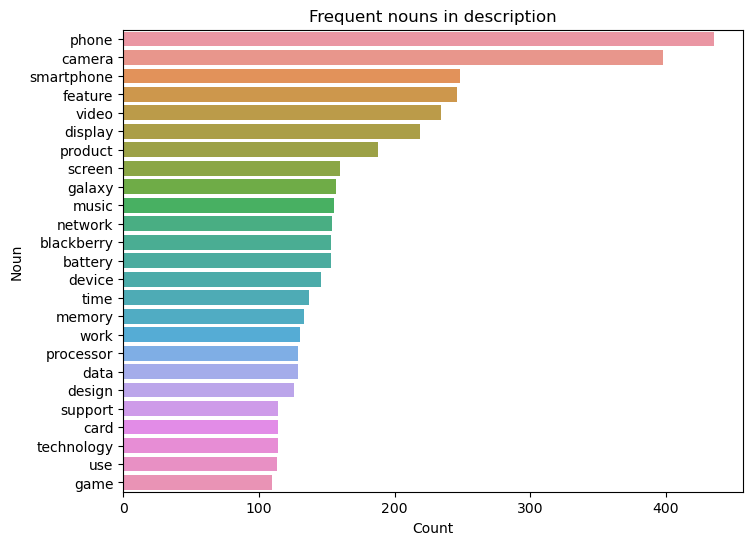

In [110]:
# Plot using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x = df_nouns_freq['count'][:25], y = df_nouns_freq['value'][:25], orient='h')
plt.title('Frequent nouns in description')
plt.xlabel('Count')
plt.ylabel('Noun')
plt.show()

In [111]:
df_nouns_freq.to_csv('data/ontology.csv', index=False, sep=';')

# SENTIMENT ANALYSIS

1) SENTIMENT-ANALYSIS DOCUMENT LEVEL

In [112]:
dataset.head()

,overall,reviewText,description,brand,feature,price,asin,preprocessedReviewText
0,5.0,I have read a lot of the reviews and spoken to...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO,"[(I, PRON, 0.0), (read, VERB, 0.0), (lot, ADV,..."
1,4.0,Or maybe not. The good news is that for less ...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO,"[(Or, CONJ, 0.0), (maybe, ADV, 0.0), (The, DET..."
2,4.0,Having previously owned the LG VX9800 (one of ...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO,"[(Having, VERB, 0.0), (previously, ADV, 0.0), ..."
3,3.0,3.5 stars. I was very excited about the launc...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO,"[(35, NUM, 0.0), (star, NOUN, 0.0), (I, PRON, ..."
4,1.0,I want to warn IT professionals that Verizon W...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO,"[(I, PRON, 0.0), (want, VERB, 1.0), (warn, ADP..."


In [113]:
def calculate_review_sentiment_score(x):
    tot = 0
    card = 0
    for word, _, score in x:
        if score != 0:
            tot += score
            card += 1
    
    return tot/card if card != 0 else 0    

In [114]:
dataset['RSS'] = dataset['preprocessedReviewText'].apply(calculate_review_sentiment_score)

In [115]:
dataset.head()

,overall,reviewText,description,brand,feature,price,asin,preprocessedReviewText,RSS
0,5.0,I have read a lot of the reviews and spoken to...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO,"[(I, PRON, 0.0), (read, VERB, 0.0), (lot, ADV,...",1.225806
1,4.0,Or maybe not. The good news is that for less ...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO,"[(Or, CONJ, 0.0), (maybe, ADV, 0.0), (The, DET...",0.818182
2,4.0,Having previously owned the LG VX9800 (one of ...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO,"[(Having, VERB, 0.0), (previously, ADV, 0.0), ...",1.136364
3,3.0,3.5 stars. I was very excited about the launc...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO,"[(35, NUM, 0.0), (star, NOUN, 0.0), (I, PRON, ...",0.761905
4,1.0,I want to warn IT professionals that Verizon W...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO,"[(I, PRON, 0.0), (want, VERB, 1.0), (warn, ADP...",-0.125000


I ratings sono da 1 a 5, mentre i sentiment scores da -5 a 5, quindi vengono normalizzati tra 1 e 5 

In [116]:
def normalize_RSS(x):
    norm = 0
    if x >= 3:
        norm = 5

    elif 1 < x <= 3:
        norm = 4

    elif -0.5 < x <= 1:
        norm = 3

    elif -3 < x <= -0.5:
        norm = 2

    elif x <= -3 :
        norm = 1

    return norm

In [117]:
dataset['RSS'] = dataset['RSS'].apply(normalize_RSS)

In [118]:
dataset.head()

,overall,reviewText,description,brand,feature,price,asin,preprocessedReviewText,RSS
0,5.0,I have read a lot of the reviews and spoken to...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO,"[(I, PRON, 0.0), (read, VERB, 0.0), (lot, ADV,...",4
1,4.0,Or maybe not. The good news is that for less ...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO,"[(Or, CONJ, 0.0), (maybe, ADV, 0.0), (The, DET...",3
2,4.0,Having previously owned the LG VX9800 (one of ...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO,"[(Having, VERB, 0.0), (previously, ADV, 0.0), ...",4
3,3.0,3.5 stars. I was very excited about the launc...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO,"[(35, NUM, 0.0), (star, NOUN, 0.0), (I, PRON, ...",3
4,1.0,I want to warn IT professionals that Verizon W...,['Like new in box great looking phone get it b...,Motorola,[],$17.99,B000FYU4SO,"[(I, PRON, 0.0), (want, VERB, 1.0), (warn, ADP...",3


2. SENTIMENT-ANALYSIS SENTENCE LEVEL

NLTK Punkt Sentence Tokenizer per splittare le reviews in sentences

In [119]:
def split_reviews_into_sentences(df, review_column, product_column):
    tokenizer = nltk.data.load('tokenizers/punkt/english.pickle') #sentence_tokenizer
    
    sentences = []
    review_indices = []
    product_ids = []
    
    for idx, row in df.iterrows():
        review = row[review_column]
        product = row[product_column]
        
        for sentence in tokenizer.tokenize(review):
            sentences.append(sentence)
            review_indices.append(idx)
            product_ids.append(product)
    
    return pd.DataFrame({
        'sentence': sentences,
        'review_index': review_indices,
        'product_id': product_ids
    })

In [120]:
sentences_df = split_reviews_into_sentences(dataset, 'reviewText', 'asin')

In [121]:
dataset['reviewText'][0]

'I have read a lot of the reviews and spoken to a number of current owners of the Motorola Q. I have also owned and used Blackberries, Treo\'s, LG Phones including the LG VX9800 and the Motorola Razor. I picked one up this week and here are my initial impressions.\n\nThe phone layout and design are excellent. Compared to other devices like the Blackberry and Treo, the keys are in a much better location (about  up from the bottom end of the phone) making it much less stressful on the thumbs to type. The keys functions are very similar to a Blackberry. Takes a little bit of getting use to but learn very quickly.\n\nActive Sync, which it comes with, is a breeze to set-up and start syncing. Works great with Outlook. I also have set-up my device to pull down emails from my gmail account. I read one review that said everything was being doubled when transferring. No so here. Works like a charm and very fast. Internet connections are much faster that on my Blackberry, which my work has suppli

In [122]:
sentences_df[sentences_df['review_index'] == 0]

,sentence,review_index,product_id
0,I have read a lot of the reviews and spoken to...,0,B000FYU4SO
1,I picked one up this week and here are my init...,0,B000FYU4SO
2,The phone layout and design are excellent.,0,B000FYU4SO
3,Compared to other devices like the Blackberry ...,0,B000FYU4SO
4,The keys functions are very similar to a Black...,0,B000FYU4SO
5,Takes a little bit of getting use to but learn...,0,B000FYU4SO
6,"Active Sync, which it comes with, is a breeze ...",0,B000FYU4SO
7,Works great with Outlook.,0,B000FYU4SO
8,I also have set-up my device to pull down emai...,0,B000FYU4SO
9,I read one review that said everything was bei...,0,B000FYU4SO


In [123]:
sentences_df.shape

(78912, 3)

In [125]:
sentences_df['preprocessedSentence'] = preprocess(sentences_df, 'sentence')

100%|██████████████████████████████████████████████████████████████████████████| 78912/78912 [01:09<00:00, 1140.23it/s]


In [126]:
sentences_df

,sentence,review_index,product_id,preprocessedSentence
0,I have read a lot of the reviews and spoken to...,0,B000FYU4SO,"[(I, PRON, 0.0), (read, VERB, 0.0), (lot, ADV,..."
1,I picked one up this week and here are my init...,0,B000FYU4SO,"[(I, PRON, 0.0), (picked, VERB, 0.0), (one, NU..."
2,The phone layout and design are excellent.,0,B000FYU4SO,"[(The, DET, 0.0), (phone, NOUN, 0.0), (layout,..."
3,Compared to other devices like the Blackberry ...,0,B000FYU4SO,"[(Compared, NOUN, 0.0), (device, NOUN, 0.0), (..."
4,The keys functions are very similar to a Black...,0,B000FYU4SO,"[(The, DET, 0.0), (key, ADJ, 0.0), (function, ..."
...,...,...,...,...
78907,!,17566,B01GXAT0BK,[]
78908,Work fantastic.,17567,B01H93TCCM,"[(Work, NOUN, 0.0), (fantastic, ADJ, 4.0)]"
78909,I haven't had any issues with it since I recei...,17567,B01H93TCCM,"[(I, PRON, 0.0), (havent, VERB, 0.0), (issue, ..."
78910,Yes it's refurbished but.,17567,B01H93TCCM,"[(Yes, X, 1.0), (refurbished, VERB, 0.0)]"
